In [4]:
import numpy as np

# Matriz de transição T
T = np.zeros((101, 101))

# Todas as escadas e cobras (entidades)
entities = [(1,38), (4,14), (9,31), (21,42), (28,84),
           (36,44), (51,67), (71,91), (80,100), (16,6),
           (48,26), (49,11), (56,53), (62,19), (64,60),
           (87,24), (93,73), (95,75),(98,78)]

# Preenchendo as probabilidades (sem as escadas e cobras)
for i in range(1,101):
    T[i-1,i:i+6] = 1/6

# Garantindo que o jogador vença se chegar ou passar da casa 100
T[95:100,100] += np.linspace(1/6, 5/6, 5)

# Preenchendo o efeito das entidades no grid
for (i,j) in entities:
    temp = np.where(T[:,i] > 0)
    T[:,i] = 0
    T[temp,j] += 1/6

# Vetor posição do jogador, iniciando na casa "0" com prob. 1
player_pos = np.zeros(101)
player_pos[0] = 1

pdf = []

# Realização das iterações para calculo da pdf
for i in range(0,200):
    pdf.append(np.linalg.matrix_power(T.T, i)[-1] @ player_pos)

# cdf
cdf = np.cumsum(pdf)

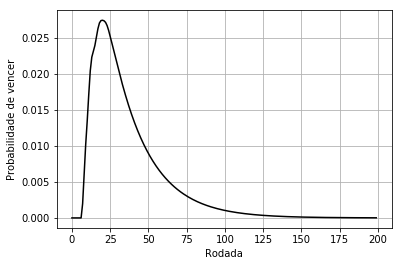

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(0, 200), pdf, color='black')
plt.grid(True)
plt.xlabel('Rodada')
plt.ylabel('Probabilidade de vencer');

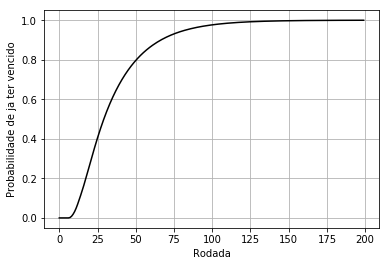

In [6]:
plt.plot(np.arange(0, 200), cdf, color='black')
plt.grid(True)
plt.xlabel('Rodada')
plt.ylabel('Probabilidade de ja ter vencido');